In [3]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler
#data split
from sklearn.model_selection import train_test_split#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm


#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#예측
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Gradient
from sklearn.ensemble import GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score#분류
#로지스틱 회귀
from statsmodels.api import Logit
#의사결정나무
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#그래디언트부스트
from sklearn.ensemble import GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier
from xgboost import plot_importance
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc#사용할 함수 선언#RSME: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100#XG Boost에서 사용할 정확도 표현 함수
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)#for ignoring warning
import warnings
warnings.filterwarnings('ignore')#음수표시
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
matplotlib.rc("axes", unicode_minus = False)
plt.rcParams["font.family"] = 'NanumGothic'

# 데이터 읽기

In [4]:
df_raw = pd.read_csv('tele_customer_final.csv')
df_raw = df_raw.drop(labels = 'Unnamed: 0',axis = 1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6859 entries, 0 to 6858
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            6859 non-null   object 
 1   Gender                6859 non-null   object 
 2   Age                   6859 non-null   int64  
 3   AgeGroup              6859 non-null   object 
 4   Married               6859 non-null   object 
 5   Dependents            6859 non-null   object 
 6   noDependents          6859 non-null   int64  
 7   Referrals             6859 non-null   object 
 8   noReferrals           6859 non-null   int64  
 9   PaperlessBilling      6859 non-null   object 
 10  PaymentMethod         6859 non-null   object 
 11  OnlineSecurity        6859 non-null   object 
 12  OnlineBackup          6859 non-null   object 
 13  TechSupport           6859 non-null   object 
 14  UnlimitedData         6859 non-null   object 
 15  AvgDownloadGB        

# 평균과금액 (y = Monthly_charge)

# 필요없는 것 빼기

## df_raw_drop하고 과금액용

In [5]:
df_raw_ch = df_raw.drop(['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp', \
                         'Sum_charge', 'ChurnReason', 'AvgRoamCharge', \
                         'TotalRoamCharge'], axis = 1, inplace = False)
df_raw_ch

,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,PaymentMethod,...,AvgDownloadGB,ChurnLabel,ChurnScore,ChurnCategory,CustomerLTV,SatisScore,TotalExtraDataCharge,Tenure_month,Monthly_charge,ReasonCategory
0,여성,37,30대,Yes,No,0,Yes,2,Yes,신용카드,...,16,No,65,NaN,2205,3,0,21,83590.476190,NaN
1,남성,46,40대,No,No,0,No,0,No,신용카드,...,10,No,66,NaN,5414,5,11300,21,68928.571429,NaN
2,남성,50,50대,No,No,0,No,0,Yes,계좌이체,...,30,Yes,71,Company,4479,1,0,5,98180.000000,Price
3,남성,78,70대,Yes,No,0,Yes,1,Yes,계좌이체,...,4,Yes,99,Cosumer,3714,1,0,14,112742.857143,PS
4,여성,75,70대,Yes,No,0,Yes,3,Yes,신용카드,...,11,Yes,68,Cosumer,3464,1,0,4,94500.000000,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6854,여성,20,20대,No,No,0,No,0,No,신용카드,...,59,No,59,NaN,3161,4,0,25,64428.000000,NaN
6855,남성,40,40대,Yes,No,0,Yes,1,Yes,계좌이체,...,17,Yes,68,Cosumer,5248,1,0,23,101891.304348,PS
6856,남성,22,20대,No,No,0,No,0,Yes,신용카드,...,51,No,33,NaN,5870,5,0,14,56600.000000,NaN
6857,남성,21,20대,No,No,0,Yes,5,No,신용카드,...,58,No,59,NaN,4792,3,0,79,80107.594937,NaN


## df_raw_high_dummy는 df_raw_high를 더미한 것임   

In [6]:
#get dummy
df_raw_ch_dummy = pd.get_dummies(df_raw_ch)

# Data_split

## df_raw_high

In [7]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_ch_x = df_raw_ch_dummy.drop("Monthly_charge", axis = 1, inplace = False) #목표변수 외
df_raw_ch_y = df_raw_ch_dummy["Monthly_charge"] #목표변수ch

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_ch_x, df_raw_ch_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_ch_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_ch_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (6859, 46)
분할 후 설명변수 데이터 : (4115, 46) 
 Test (2744, 46)


## df_scaled_dummy

# VF를 위한 `의사결정 나무`

In [8]:
tree_uncustomized = DecisionTreeRegressor(random_state = 42)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(random_state=42)

In [9]:
#train 및 설명력 결과 저장
train_score = []
test_score = []

#param 지정을 위한 범위
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]


In [10]:
#기본 설며ㅇ력
#train data 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.321


In [11]:
#분리 노드의 최소 자료수
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 42, \
                                   max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [12]:
#depth 6 설명력
#train data 설명력
print("Score on training set: {:.3f}".format(tree_graph.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_graph.score(df_test_x, df_test_y)))

Score on training set: 0.700
Score on test set: 0.657


In [13]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_graph.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,AvgDownloadGB,0.843
8,Tenure_month,0.084
26,PaymentMethod_계좌이체,0.019
37,ChurnLabel_No,0.012
31,OnlineBackup_No,0.010
4,ChurnScore,0.006
24,PaperlessBilling_No,0.005
32,OnlineBackup_Yes,0.005
38,ChurnLabel_Yes,0.004
25,PaperlessBilling_Yes,0.004


Text(0, 0.5, '변수')

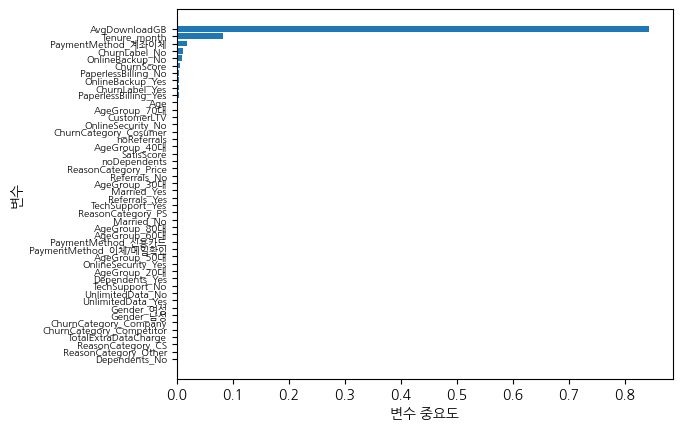

In [14]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF를 위한 `RF`

In [15]:
rf_uncustomized = RandomForestRegressor(random_state = 42)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.955
Score on test set: 0.653


In [16]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
#n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1, 11)]

In [17]:
rf_test = RandomForestRegressor(random_state = 42, max_depth = 6)
rf_test.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_test.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_test.score(df_test_x, df_test_y)))

Score on training set: 0.718
Score on test set: 0.669


In [18]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_test.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,AvgDownloadGB,0.831
8,Tenure_month,0.082
26,PaymentMethod_계좌이체,0.013
4,ChurnScore,0.009
37,ChurnLabel_No,0.008
38,ChurnLabel_Yes,0.008
31,OnlineBackup_No,0.008
25,PaperlessBilling_Yes,0.007
24,PaperlessBilling_No,0.007
0,Age,0.007


Text(0, 0.5, '변수')

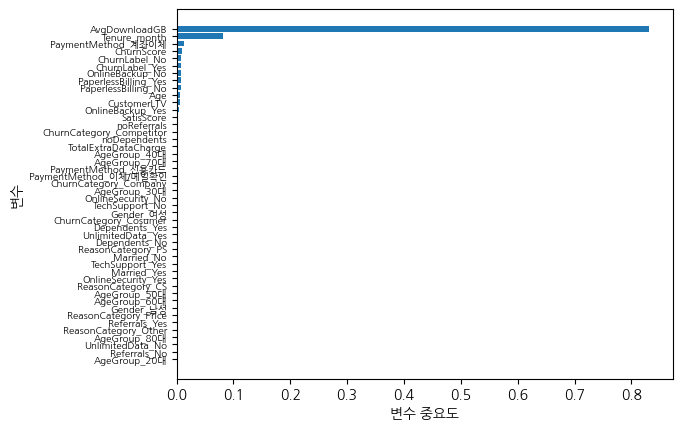

In [19]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF를 위한 `GB`

In [20]:
#모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.731
Score on test set: 0.670


In [21]:
gb_test = GradientBoostingRegressor(random_state = 42, max_depth = 6)
gb_test.fit(df_train_x, df_train_y)

#Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_test.score(df_train_x, df_train_y)))
#Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_test.score(df_test_x, df_test_y)))

Score on training set: 0.857
Score on test set: 0.650


In [22]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_test.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,AvgDownloadGB,0.708
8,Tenure_month,0.083
5,CustomerLTV,0.041
4,ChurnScore,0.026
0,Age,0.026
26,PaymentMethod_계좌이체,0.014
32,OnlineBackup_Yes,0.011
25,PaperlessBilling_Yes,0.008
24,PaperlessBilling_No,0.007
38,ChurnLabel_Yes,0.007


Text(0, 0.5, '변수')

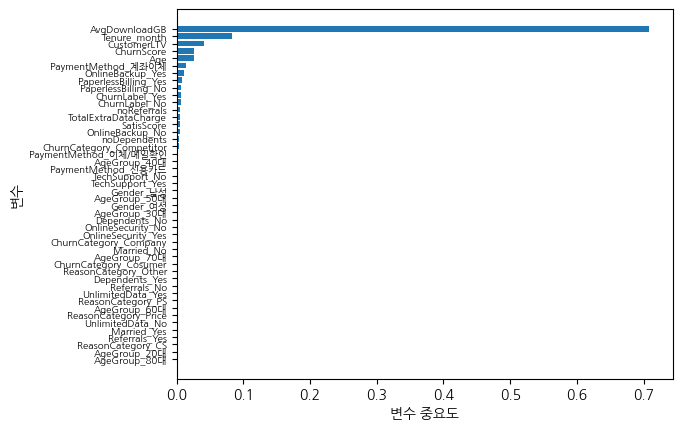

In [23]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF 최종 변수

- 최종 쓸 변수 (describe + DT + RF + GB, 2개 이상 교집)
AvgDownloadGB/Tenure_month/PaymentMethod/ChurnScore/ChurnLabel

# 새롭게 산출된 Data --> df_raw_finch

In [24]:
df_raw_finch = pd.DataFrame()

최종 데이터

In [25]:
df_raw_finch['AvgDownloadGB'] = df_raw['AvgDownloadGB']
df_raw_finch['Tenure_month'] = df_raw['Tenure_month']
df_raw_finch['PaymentMethod'] = df_raw['PaymentMethod']
df_raw_finch['ChurnScore'] = df_raw['ChurnScore']
df_raw_finch['ChurnLabel'] = df_raw['ChurnLabel']

df_raw_finch['Monthly_charge'] = df_raw['Monthly_charge']

df_raw_finch

,AvgDownloadGB,Tenure_month,PaymentMethod,ChurnScore,ChurnLabel,Monthly_charge
0,16,21,신용카드,65,No,83590.476190
1,10,21,신용카드,66,No,68928.571429
2,30,5,계좌이체,71,Yes,98180.000000
3,4,14,계좌이체,99,Yes,112742.857143
4,11,4,신용카드,68,Yes,94500.000000
...,...,...,...,...,...,...
6854,59,25,신용카드,59,No,64428.000000
6855,17,23,계좌이체,68,Yes,101891.304348
6856,51,14,신용카드,33,No,56600.000000
6857,58,79,신용카드,59,No,80107.594937


In [26]:
#get dummy
df_raw_finch_dummy = pd.get_dummies(df_raw_finch)

## 최종 DT, RF, GB에 쓸 데이터 -> df_raw_finch_dummy

In [27]:
df_raw_finch_dummy

,AvgDownloadGB,Tenure_month,ChurnScore,Monthly_charge,PaymentMethod_계좌이체,PaymentMethod_신용카드,PaymentMethod_이체/메일확인,ChurnLabel_No,ChurnLabel_Yes
0,16,21,65,83590.476190,0,1,0,1,0
1,10,21,66,68928.571429,0,1,0,1,0
2,30,5,71,98180.000000,1,0,0,0,1
3,4,14,99,112742.857143,1,0,0,0,1
4,11,4,68,94500.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
6854,59,25,59,64428.000000,0,1,0,1,0
6855,17,23,68,101891.304348,1,0,0,0,1
6856,51,14,33,56600.000000,0,1,0,1,0
6857,58,79,59,80107.594937,0,1,0,1,0


## data split

In [28]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_finch_x = df_raw_finch_dummy.drop(["Monthly_charge"], axis = 1, inplace = False) #목표변수 외
df_raw_finch_y = df_raw_finch_dummy["Monthly_charge"] #목표변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_finch_x, df_raw_finch_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_finch_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_finch_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (6859, 8)
분할 후 설명변수 데이터 : (4115, 8) 
 Test (2744, 8)


# 분류

# 의사결정나무

In [29]:
dt_uncustomized = RandomForestRegressor(random_state = 42)
dt_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.946
Score on test set: 0.608


In [30]:
#train 및 설명력 결과 저장
train_score = []
test_score = []

#param 지정을 위한 범위
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]


## Grid SearchCV

In [29]:
estimator = DecisionTreeRegressor(random_state = 42)
#구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeRegressor(max_depth=6, min_samples_leaf=11, min_samples_split=32,
                      random_state=42)

best parameter:
{'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 32}

best score:
0.669


In [31]:
#분리 노드의 최소 자료수
v_feature_name = df_train_x.columns

tree_final = DecisionTreeRegressor(random_state = 42, \
                                   max_depth = 6, \
                                   min_samples_leaf = 11, \
                                   min_samples_split = 32)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=11, min_samples_split=32,
                      random_state=42)

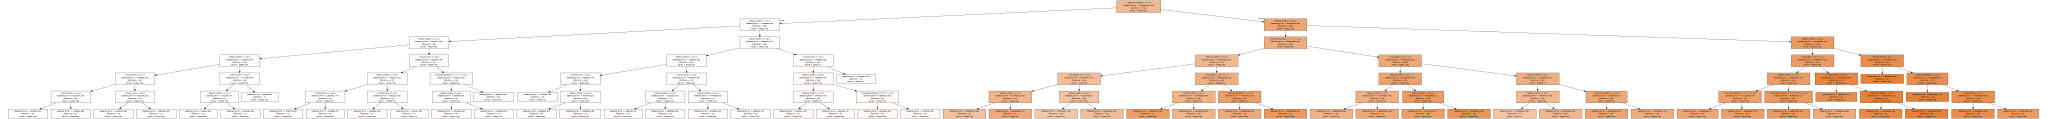

In [32]:
# 트리 모델을 tree_final.dot 파일로 저장 
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["churn", "active"],
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [33]:
#train data 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.686
Score on test set: 0.654


# RandomForest

In [34]:
rf_uncustomized = RandomForestRegressor(random_state = 42)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.946
Score on test set: 0.608


In [35]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
#n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1, 11)]

## Grid Search

In [35]:
estimator = RandomForestRegressor(random_state = 42)
#구하고자 하는 parameter와 범위
param_grid = {"n_estimators": para_n_tree ,"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=40,
                      n_estimators=50, random_state=42)

best parameter:
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 40, 'n_estimators': 50}

best score:
0.673


## 최종모델

In [36]:
rf_final = RandomForestRegressor(random_state = 42, n_estimators = 50, min_samples_leaf = 10,
                                 min_samples_split = 40, max_depth = 5)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.684
Score on test set: 0.658


## 시각화

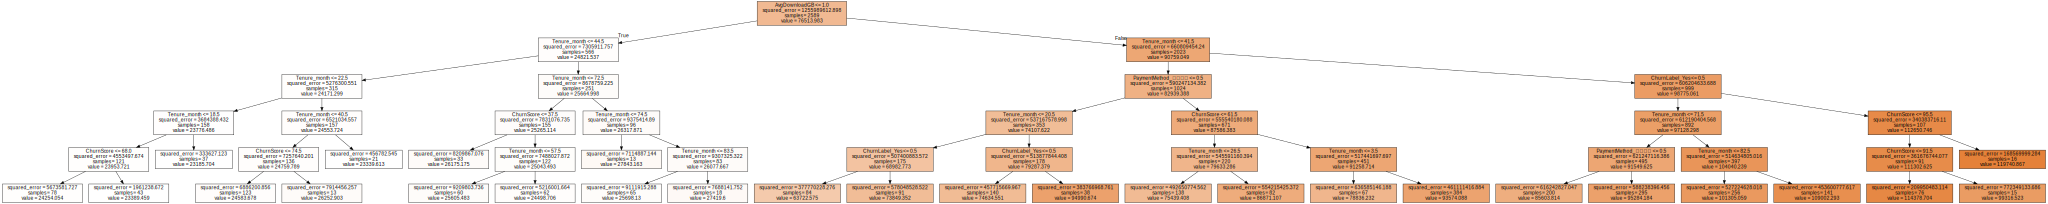

In [37]:
#변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 중요도

In [38]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,AvgDownloadGB,0.866
1,Tenure_month,0.091
3,PaymentMethod_계좌이체,0.016
7,ChurnLabel_Yes,0.013
6,ChurnLabel_No,0.009
2,ChurnScore,0.005
4,PaymentMethod_신용카드,0.001
5,PaymentMethod_이체/메일확인,0.000


Text(0, 0.5, '변수')

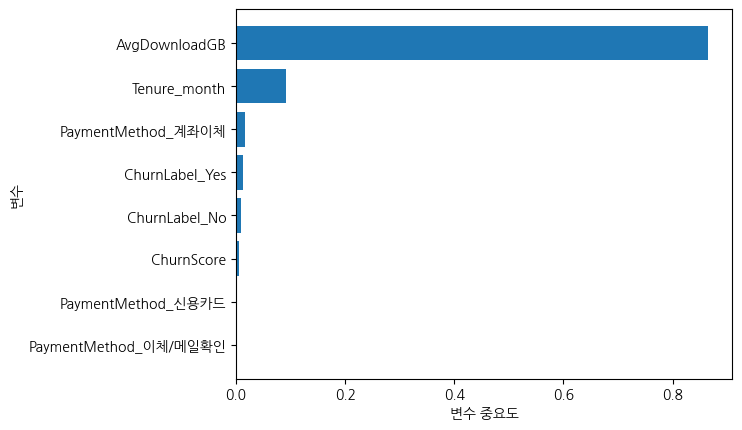

In [39]:
#설명변수 중요도 그래프 149 ~ 150p
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Gradient Boost

In [40]:
#모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.698
Score on test set: 0.656


In [41]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경 (10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]
para_split = [n_split * 2 for n_split in range(1, 21)]
para_depth = [depth for depth in range(1, 11)]
para_lr = [lr * 0.1 for lr in range(1, 10)]

In [42]:
#모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.698
Score on test set: 0.656


In [43]:
# n_estimatos  설정

train_score = []; test_score = []

para_n_tree = [n_tree *10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    

df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [44]:
# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.578,0.564
1,20,0.659,0.641
2,30,0.675,0.654
3,40,0.682,0.658
4,50,0.686,0.659
5,60,0.689,0.658
6,70,0.692,0.658
7,80,0.694,0.657
8,90,0.696,0.657
9,100,0.698,0.656


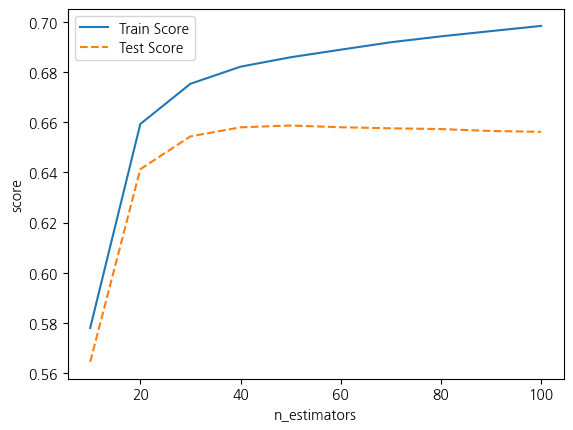

In [45]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [46]:
#편차가 가장 적은 지점인 n_estimatos=50 지점 선택 

In [47]:
#leaf 모델 성능을 비교

train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 50, min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [48]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.686,0.659
1,2,0.686,0.659
2,3,0.686,0.658
3,4,0.686,0.659
4,5,0.686,0.658
5,6,0.686,0.658
6,7,0.686,0.659
7,8,0.686,0.659
8,9,0.686,0.659
9,10,0.686,0.659


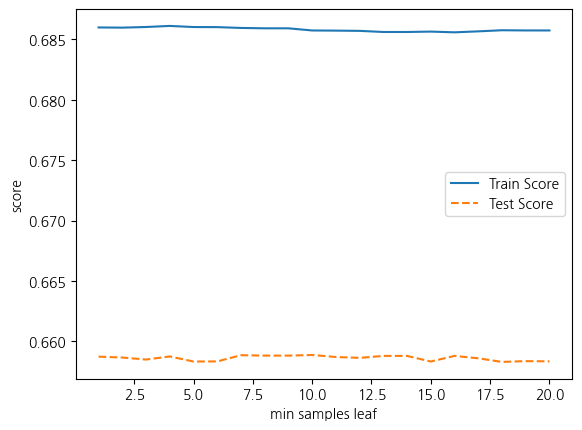

In [49]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [50]:
#, min_samples_leaf = 4 지정 x

In [51]:
# min_sampels_split: 모델 성능을 비교

train_score = []; test_score = []

para_split = [n_split * 4 for n_split in range(1, 31)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 50, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [52]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.686,0.659
1,8,0.686,0.659
2,12,0.686,0.659
3,16,0.686,0.659
4,20,0.686,0.659
5,24,0.686,0.659
6,28,0.686,0.659
7,32,0.686,0.659
8,36,0.686,0.659
9,40,0.686,0.659


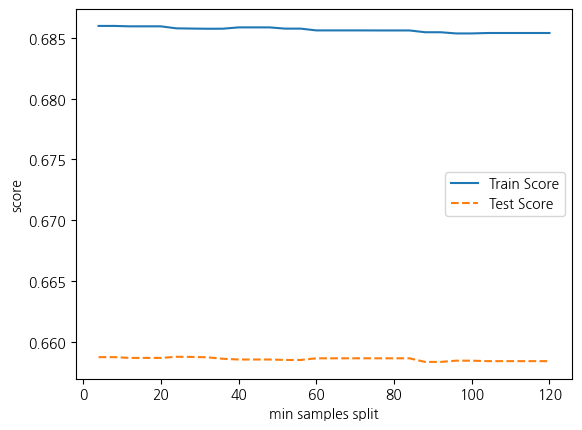

In [53]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [54]:
#max_depth 모델 성능을 비교한다

train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 50, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [55]:
# 모델 설명력 확인
df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.636,0.623
1,2,0.676,0.654
2,3,0.686,0.659
3,4,0.698,0.658
4,5,0.716,0.653
5,6,0.744,0.649
6,7,0.782,0.637
7,8,0.829,0.629
8,9,0.875,0.612
9,10,0.919,0.595


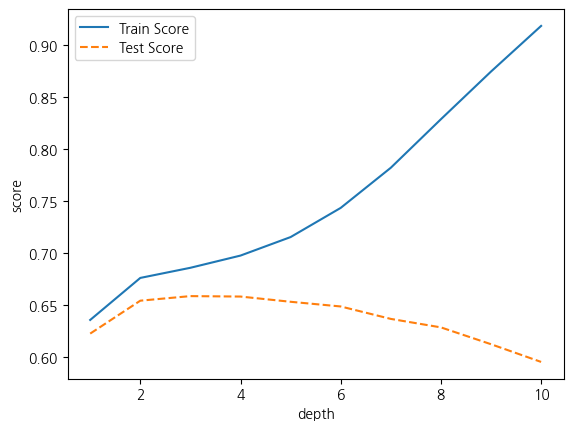

In [56]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [57]:
#편차가 가장 적은 지점인 depth=3 선택

In [58]:
#learnin_rate 모델 성능을 비교한다

train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 50, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
#결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

In [59]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.686,0.659
1,0.2,0.699,0.658
2,0.3,0.707,0.652
3,0.4,0.718,0.648
4,0.5,0.723,0.642
5,0.6,0.729,0.638
6,0.7,0.733,0.629
7,0.8,0.734,0.626
8,0.9,0.737,0.619


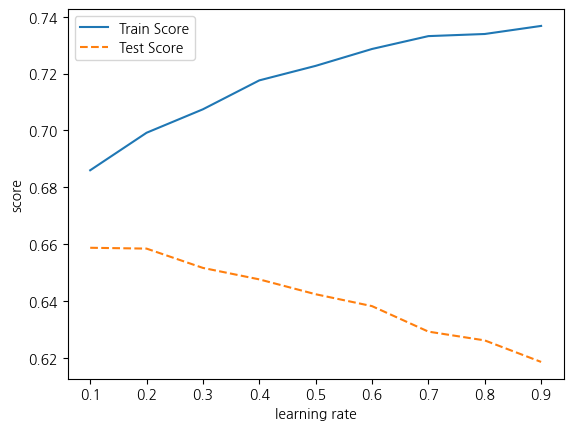

In [60]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [61]:
# 편차 적은 지점 0.1 픽

In [62]:
#최종 모델을 생성한다
gb_final = GradientBoostingRegressor(random_state = 42, n_estimators = 50, max_depth = 3, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)


print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))



Score on training set: 0.686
Score on test set: 0.659


- 범주형 변수가 없기 때문에 dummy 할 필요 x

# 최종 모델 평가

In [65]:
#Decision Tree
dt_model = DecisionTreeRegressor(random_state = 42, \
                                   max_depth = 6, \
                                   min_samples_leaf = 11, \
                                   min_samples_split = 32)
dt_model.fit(df_train_x, df_train_y)

#Random Forest
rf_model = RandomForestRegressor(random_state = 42, n_estimators = 50, min_samples_leaf = 10,
                                 min_samples_split = 40, max_depth = 5)
rf_model.fit(df_train_x, df_train_y)

#Gradient Boosting
gb_model = GradientBoostingRegressor(random_state = 42, n_estimators = 50, max_depth = 3, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [66]:
#모델 리스트, 그래프를 그리기 생성 목적
models = ["의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
#평가 리스트 초기화
mse, rmse, mae, mape = [], [], [], []

## 의사결정 나무

In [67]:
#예측
dt_y_pred = dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

## RF

In [68]:
#예측
rf_y_pred = rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

## GB

In [69]:
#예측
gb_y_pred = gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

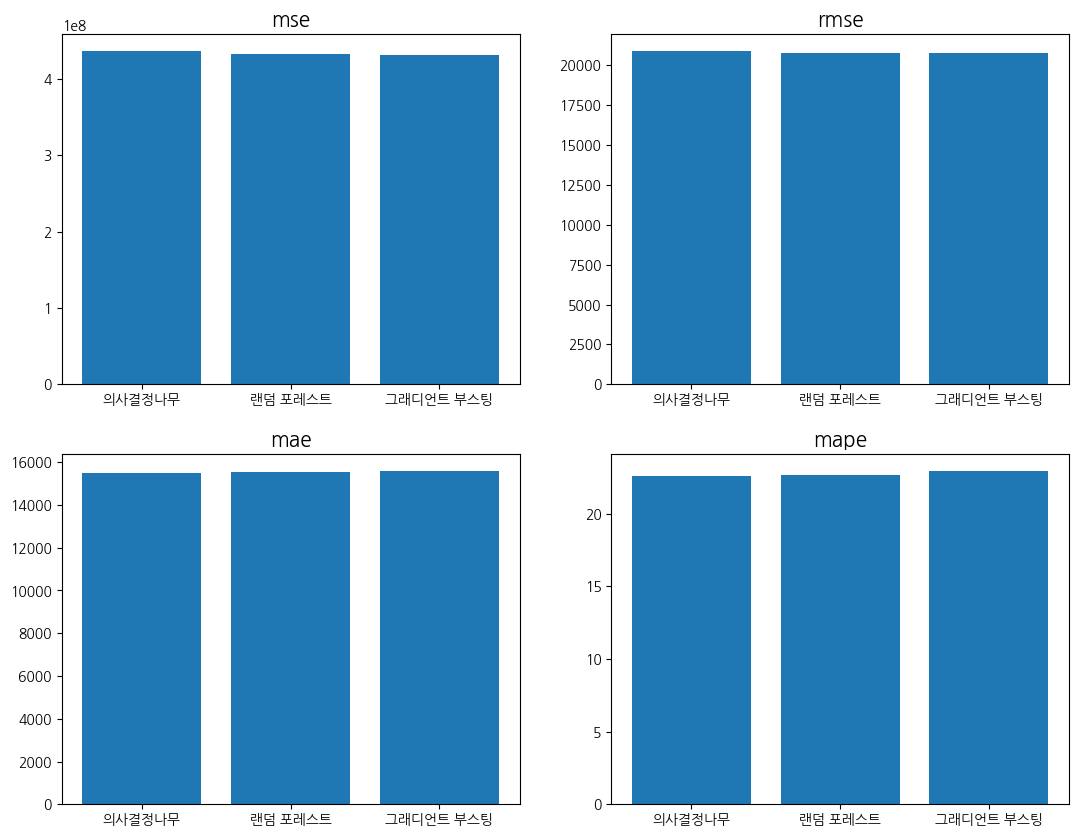

In [70]:
#평가
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)